<a href="https://colab.research.google.com/github/najwarahma/Visi-Komputer2025/blob/main/Jobsheet%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Praktikum D1 – Regresi dari Citra Sintetis (Prediksi Radius Lingkaran)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r=5, max_r=20):
  r = np.random.randint(min_r, max_r + 1) # radius acak
  img = np.zeros((img_size, img_size), dtype=np.uint8)
  cx = np.random.randint(r, img_size - r) # center-x
  cy = np.random.randint(r, img_size - r) # center-y
  cv2.circle(img, (cx, cy), r, (255,), -1) # lingkaran putih terisi
  img = (img / 255.0).astype(np.float32)
  # 3-channel biar kompatibel CNN
  img3 = np.stack([img, img, img], axis=-1)
  return img3, float(r), (cx, cy)

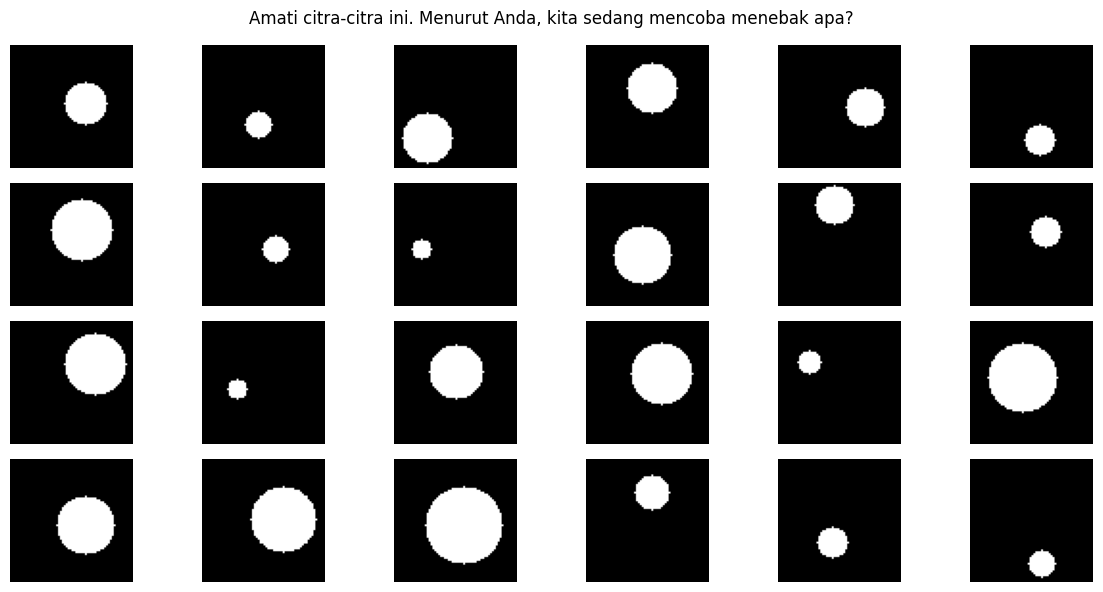

In [ ]:
# Buat 24 contoh untuk visualisasi
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
centers = [s[2] for s in samples]
# Grid gambar tanpa label:
cols = 6
rows = N_show // cols
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.axis('off')
plt.suptitle("Amati citra-citra ini. Menurut Anda, kita sedang mencoba menebak apa?")
plt.tight_layout()
plt.show()

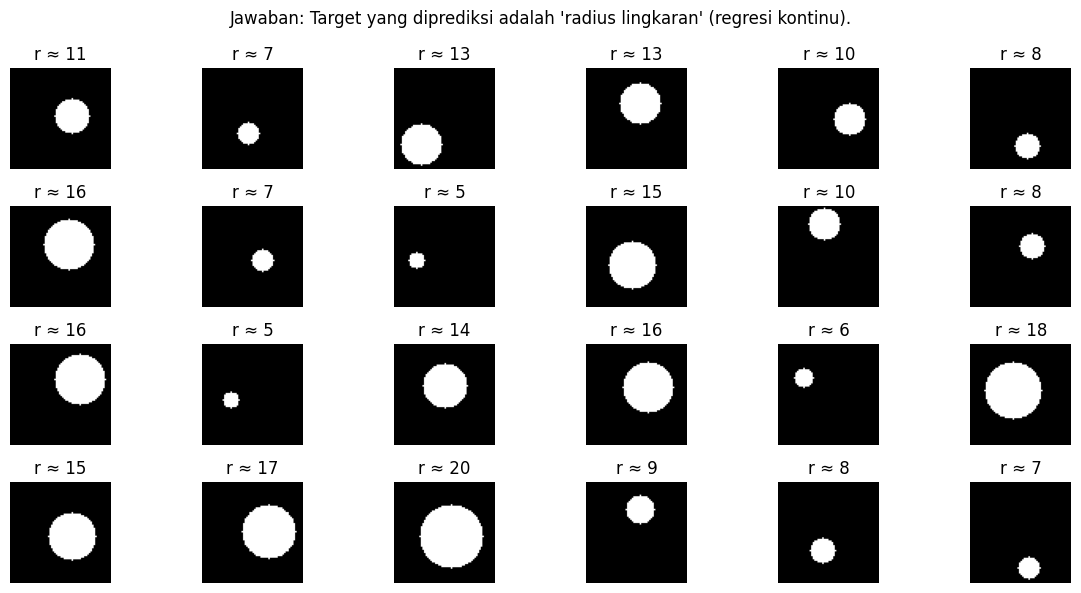

In [ ]:
# Tampilkan kembali, sekarang tampilkan radius (label) di judul tiap subplot
plt.figure(figsize=(12, 6))
for i in range(N_show):
  plt.subplot(rows, cols, i+1)
  plt.imshow(imgs[i].squeeze(), cmap='gray')
  plt.title(f"r ≈ {int(rads[i])}")
  plt.axis('off')
plt.suptitle("Jawaban: Target yang diprediksi adalah 'radius lingkaran' (regresi kontinu).")
plt.tight_layout()
plt.show()

In [ ]:
# Siapkan dataset lebih besar untuk training
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model CNN sederhana
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'), layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1) # output regresi
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte),
epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
MAE=0.926 | RMSE=1.161 | R2=0.937


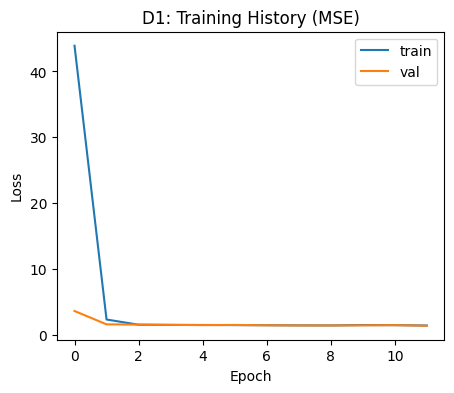

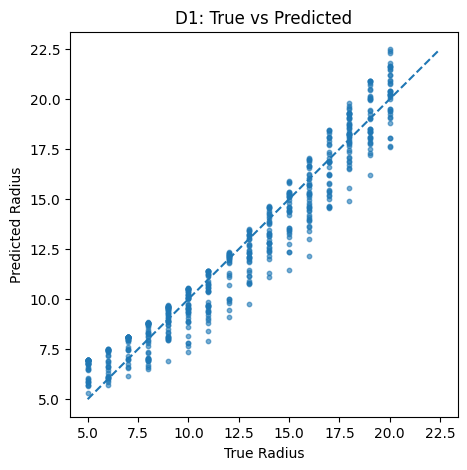

In [ ]:
# Plot loss
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

# Scatter True vs Pred
plt.figure(figsize=(5,5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius"); plt.ylabel("Predicted Radius")
plt.title("D1: True vs Predicted")
plt.show()

Tantangan Mini

ubah rentang radius (mis. 8–28) dan lihat dampaknya ke MAE/RMSE/R2.

In [ ]:
def make_sample(img_size=64, min_r=8, max_r=28):
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)
    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r), (cx, cy)

# Buat dataset baru
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model & training (sama seperti sebelumnya)
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"[Eksperimen Radius 8–28] MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
[Eksperimen Radius 8–28] MAE=0.798 | RMSE=1.008 | R2=0.973


Tambahkan noise (blur, noise Gaussian) ke citra → bagaimana performanya?

In [ ]:
def make_sample_noisy(img_size=64, min_r=5, max_r=20):
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)

    # Tambahkan blur
    img = cv2.GaussianBlur(img, (5,5), 0)

    # Tambahkan noise Gaussian
    noise = np.random.normal(0, 20, img.shape)
    img = np.clip(img + noise, 0, 255).astype(np.uint8)

    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r), (cx, cy)

# Dataset baru
X, y, C = zip(*[make_sample_noisy() for _ in range(3000)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih ulang model
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"[Eksperimen Dengan Noise] MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
[Eksperimen Dengan Noise] MAE=0.941 | RMSE=1.149 | R2=0.940


Jadikan tugas multi-output: prediksikan [r,cx,cy][r, c_x, c_y][r,cx,cy] sekaligus; metrik evaluasi apa yang cocok?

In [ ]:
def make_sample_multi(img_size=64, min_r=5, max_r=20):
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)
    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, np.array([r, cx, cy], dtype=np.float32)

# Dataset multi-output
samples = [make_sample_multi() for _ in range(3000)]
X = np.array([s[0] for s in samples], dtype=np.float32)
y = np.array([s[1] for s in samples], dtype=np.float32)

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model multi-output
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)  # output 3 nilai [r, cx, cy]
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(Xtr, ytr, validation_data=(Xte, yte), epochs=12, batch_size=64, verbose=0)

# Evaluasi
y_pred = model.predict(Xte)
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"[Multi-output: r, cx, cy] MAE={mae:.3f} | RMSE={rmse:.3f} | R2={r2:.3f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
[Multi-output: r, cx, cy] MAE=3.304 | RMSE=4.650 | R2=0.818


Praktikum D2 – Menebak Umur Manusia dari Foto Wajah (UTKFace)

In [ ]:
# Jalankan ini di awal notebook
from google.colab import files
files.upload() # pilih file kaggle.json dari komputer Anda

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"najwarahma","key":"2330c8a35c407ee5f408e94ececc3726"}'}

In [ ]:
import os, shutil
if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    !pip -q install kaggle
    print("✅ Kaggle API siap digunakan.")
else:
    print(" kaggle.json belum ditemukan. Upload terlebih dahulu.")

✅ Kaggle API siap digunakan.


In [ ]:
# Unduh dataset UTKFace (sekali saja)
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk
print("✅ Dataset UTKFace berhasil diekstrak.")

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
✅ Dataset UTKFace berhasil diekstrak.


Total gambar ditemukan: 23708


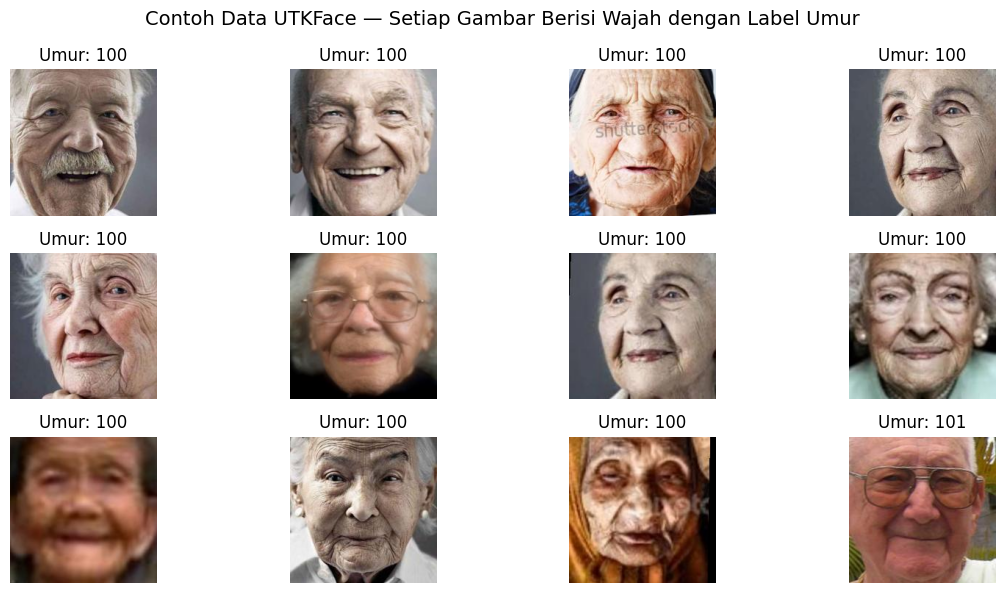

In [ ]:
import matplotlib.pyplot as plt
import os, glob
from PIL import Image
# Ambil 12 gambar acak dari dataset
files = glob.glob("/content/utk/UTKFace/*.jpg")
files = sorted(files)
print(f"Total gambar ditemukan: {len(files)}")
plt.figure(figsize=(12, 6))
for i, f in enumerate(files[:12]):
    # Ambil umur dari nama file
    age = int(os.path.basename(f).split("_")[0])
    img = Image.open(f)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Umur: {age}")
    plt.axis("off")
plt.suptitle("Contoh Data UTKFace — Setiap Gambar Berisi Wajah dengan Label Umur", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

def parse_age_from_name(fp):
    return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)
train_files, test_files, y_train, y_test = train_test_split(
    files, ages, test_size=0.2, random_state=42
)
IMG_SIZE = 160
def load_img(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    return img / 255.0, label
train_ds = tf.data.Dataset.from_tensor_slices((train_files,
y_train)).map(load_img).batch(64)
test_ds = tf.data.Dataset.from_tensor_slices((test_files,
y_test)).map(load_img).batch(64)
print("✅ Dataset siap dilatih.")

✅ Dataset siap dilatih.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Gunakan GPU jika tersedia
print("Hardware:", "GPU" if tf.config.list_physical_devices('GPU') else
"CPU")

# Buat arsitektur model
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)
base_model.trainable = False # tahap awal: freeze backbone

# Tambahkan head regresi
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1)(x) # output tunggal: umur
model = tf.keras.Model(inputs, outputs)

# Kompilasi model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='mse', metrics=['mae'])
model.summary()

Hardware: GPU
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 58s 140ms/step - loss: 338.6001 - mae: 13.5313 - val_loss: 157.3902 - val_mae: 9.5612 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 48s 65ms/step - loss: 153.3108 - mae: 9.2176 - val_loss: 145.5847 - val_mae: 9.0773 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 144.0436 - mae: 8.8581 - val_loss: 141.9636 - val_mae: 8.9322 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 140.0521 - mae: 8.7191 - val_loss: 140.2802 - val_mae: 8.8596 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - loss: 140.3130 - mae: 8.6775 - val_loss: 141.8461 - val_mae: 8.9376 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 135.0959 - mae: 8.5016 - val_loss: 135.9516 - val_mae: 8.6150 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - loss: 133.6963 - mae: 8.4608 - val_loss: 136.6624 - va

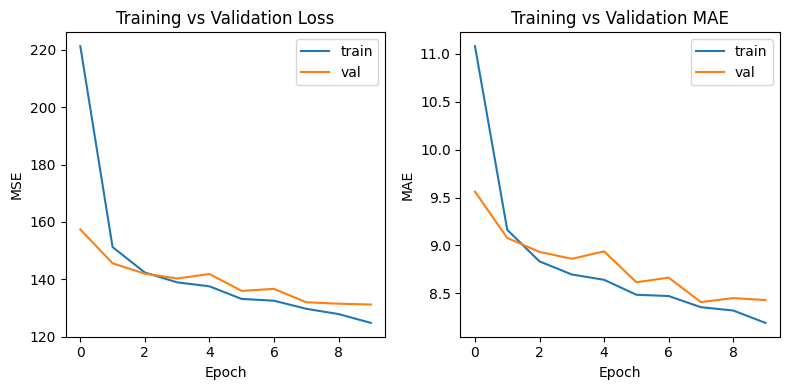

In [ ]:
# Callback untuk pelatihan yang lebih stabil
cb = [
tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True,
monitor='val_loss'),

tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-5, monitor='val_loss')

]
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

# Visualisasi perubahan loss dan MAE selama pelatihan:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MSE'); plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='train')
plt.plot(history.history['val_mae'], label='val')
plt.xlabel('Epoch'); plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.tight_layout()
plt.show()

Epoch 1/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - loss: 191.1008 - mae: 10.1854 - val_loss: 142.6142 - val_mae: 8.8444 - learning_rate: 1.0000e-04
Epoch 2/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 80.4288 - mae: 6.6619 - val_loss: 123.9032 - val_mae: 8.3559 - learning_rate: 1.0000e-04
Epoch 3/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - loss: 52.4896 - mae: 5.5045 - val_loss: 111.9052 - val_mae: 7.9325 - learning_rate: 1.0000e-04
Epoch 4/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - loss: 38.7356 - mae: 4.7313 - val_loss: 104.0339 - val_mae: 7.5273 - learning_rate: 1.0000e-04
Epoch 5/5
297/297 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step - loss: 30.3293 - mae: 4.1938 - val_loss: 114.8639 - val_mae: 7.7964 - learning_rate: 1.0000e-04


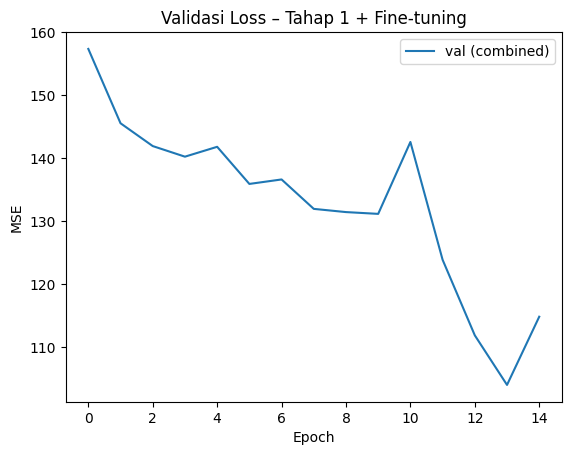

In [ ]:
# Aktifkan kembali sebagian layer terakhir untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:
  layer.trainable = False # beku sebagian besar layer

# Recompile dengan learning rate lebih kecil
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='mse', metrics=['mae'])

history_ft = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=5,
    callbacks=cb,
    verbose=1
)

# Visualisasi gabungan training dan fine-tuning:
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'],
label='val (combined)')
plt.title("Validasi Loss – Tahap 1 + Fine-tuning")
plt.xlabel("Epoch"); plt.ylabel("MSE")
plt.legend(); plt.show()

MAE = 7.53 tahun
RMSE = 10.20 tahun
R2 = 0.738


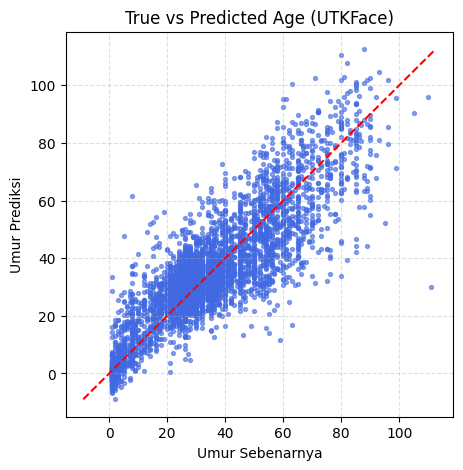

In [ ]:
from math import sqrt

y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for
batch in test_ds])
mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)

print(f"MAE = {mae:.2f} tahun")
print(f"RMSE = {rmse:.2f} tahun")
print(f"R2 = {r2:.3f}")

# Plot “umur sebenarnya vs umur prediksi”:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, s=8, alpha=0.6, color='royalblue')
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("Umur Sebenarnya")
plt.ylabel("Umur Prediksi")
plt.title("True vs Predicted Age (UTKFace)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

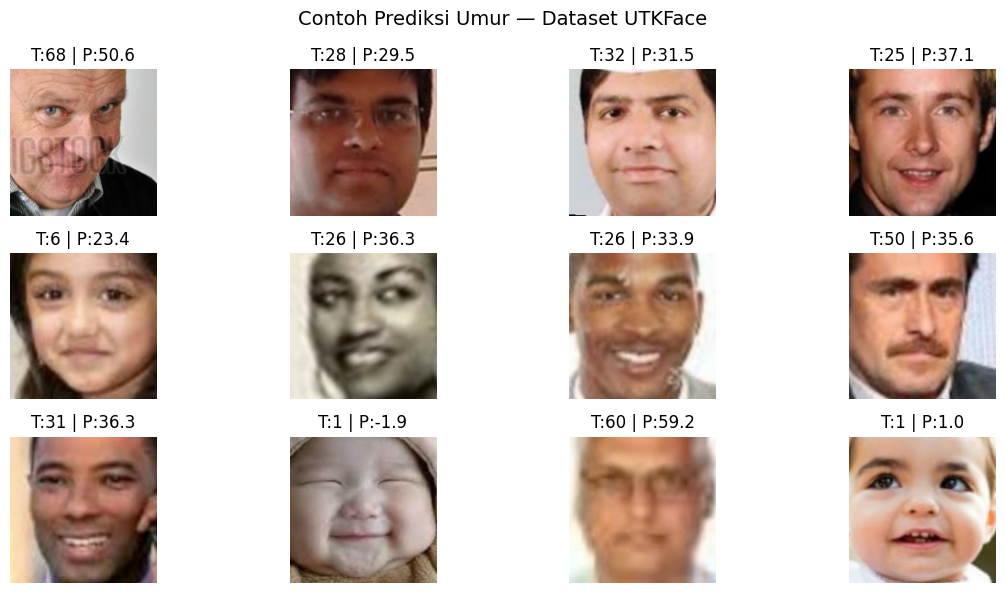

In [ ]:
import random
sample_paths = random.sample(test_files, 12)
plt.figure(figsize=(12,6))
for i, path in enumerate(sample_paths):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))/255.0
    true_age = int(os.path.basename(path).split('_')[0])
    pred_age = model.predict(tf.expand_dims(img, 0), verbose=0).ravel()[0]
    plt.subplot(3,4,i+1)
    plt.imshow(img.numpy())
    plt.title(f"T:{true_age} | P:{pred_age:.1f}")
    plt.axis('off')
plt.suptitle("Contoh Prediksi Umur — Dataset UTKFace", fontsize=14)
plt.tight_layout()
plt.show()

Tantangan mini

Tambahkan data augmentation ekstra (kontras,brightness,zoom)

In [ ]:
from tensorflow.keras import layers

# Augmentasi tambahan
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(factor=0.2),
])

# Terapkan ke dataset training
def load_img_aug(fp, label):
    img = tf.io.read_file(fp)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    img = data_augmentation(img, training=True)
    return img, label

train_ds_aug = tf.data.Dataset.from_tensor_slices((train_files, y_train)).map(load_img_aug).batch(64)

history = model.fit(
    train_ds_aug,
    validation_data=test_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 160s 539ms/step - loss: 417.2429 - mae: 15.6001 - val_loss: 207.2994 - val_mae: 10.4498 - learning_rate: 1.0000e-04
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 145s 486ms/step - loss: 381.7823 - mae: 15.0158 - val_loss: 123.4289 - val_mae: 8.3270 - learning_rate: 1.0000e-04
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 144s 484ms/step - loss: 371.1712 - mae: 14.8362 - val_loss: 144.4947 - val_mae: 8.9136 - learning_rate: 1.0000e-04
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 202s 486ms/step - loss: 367.6271 - mae: 14.7677 - val_loss: 139.8964 - val_mae: 8.7708 - learning_rate: 1.0000e-04
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 143s 483ms/step - loss: 356.0734 - mae: 14.4963 - val_loss: 168.3156 - val_mae: 9.5253 - learning_rate: 5.0000e-05


Ubah learning rate schedule atau optimizer

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=200,
    decay_rate=0.9
)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

Pisahkan dataset per kelompok

/tmp/ipython-input-2843408867.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mae = df_eval.groupby("group").apply(lambda x: mean_absolute_error(x["true"], x["pred"]))
/tmp/ipython-input-2843408867.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  group_mae = df_eval.groupby("group").apply(lambda x: mean_absolute_error(x["true"], x["pred"]))


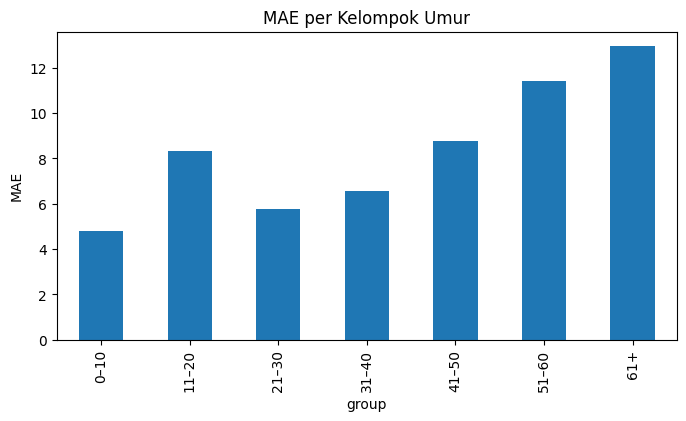

In [ ]:
import pandas as pd

bins = [0, 10, 20, 30, 40, 50, 60, 100]
labels = ["0–10", "11–20", "21–30", "31–40", "41–50", "51–60", "61+"]

df_eval = pd.DataFrame({"true": y_test, "pred": y_pred})
df_eval["group"] = pd.cut(df_eval["true"], bins=bins, labels=labels, right=True)

group_mae = df_eval.groupby("group").apply(lambda x: mean_absolute_error(x["true"], x["pred"]))
group_mae.plot(kind="bar", ylabel="MAE", title="MAE per Kelompok Umur", figsize=(8,4))
plt.show()

Uji model pada wajah sendiri

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving najwa1.jpg to najwa1.jpg


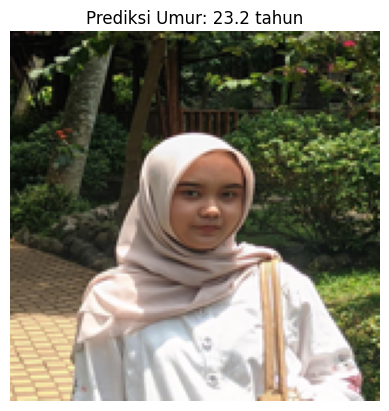

In [ ]:
from PIL import Image
import tensorflow as tf

# Baca dan ubah ukuran gambar
path = "/content/najwa1.jpg"
img = Image.open(path).convert("RGB")
img = img.resize((IMG_SIZE, IMG_SIZE))
img_arr = np.array(img) / 255.0

# Prediksi umur
pred_age = model.predict(tf.expand_dims(img_arr, 0), verbose=0).ravel()[0]
plt.imshow(img_arr)
plt.title(f"Prediksi Umur: {pred_age:.1f} tahun")
plt.axis("off")
plt.show()

Praktikum D3- Menilai "Kepopuleran Hewan Peliharaan" dari Foto

In [7]:
from google.colab import files
files.upload() # pilih kaggle.json dari komputer Anda
import os, shutil
if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    !pip -q install kaggle
    print("✅ Kaggle API siap digunakan.")
else:
    print(" kaggle.json belum ditemukan. Upload terlebih dahulu.")

Saving kaggle.json to kaggle.json
✅ Kaggle API siap digunakan.


In [8]:
# Unduh dataset Pawpularity (sekitar 800MB)
!kaggle competitions download -c petfinder-pawpularity-score -p /content -q
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw
print("✅ Dataset Pawpularity berhasil diekstrak.")

✅ Dataset Pawpularity berhasil diekstrak.


                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                path  
0  /content/p

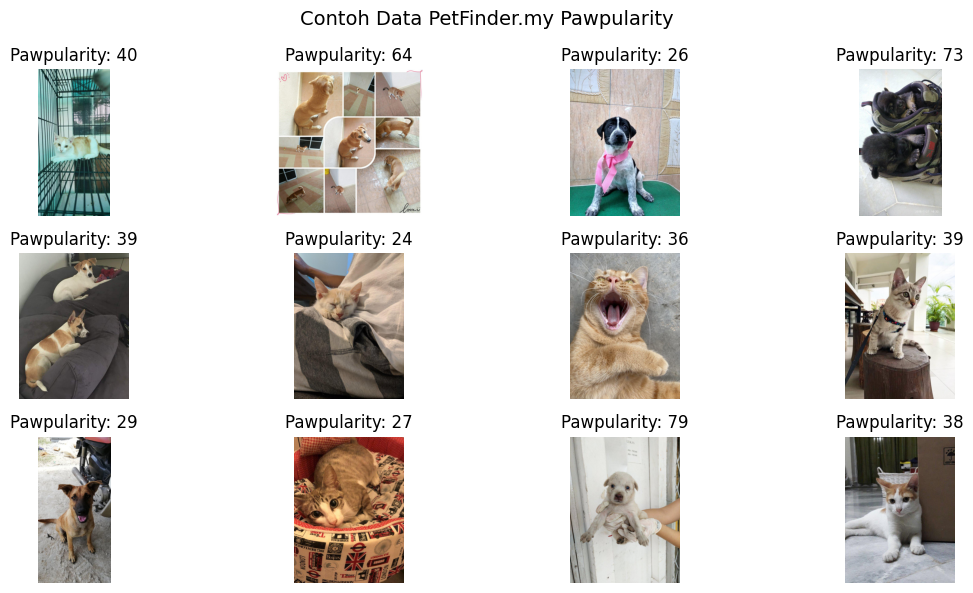

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
# Muat CSV
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print(df.head())
# Tampilkan 12 contoh gambar
plt.figure(figsize=(12, 6))
for i, row in enumerate(df.sample(12, random_state=42).itertuples()):
    img = Image.open(row.path)
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"Pawpularity: {row.Pawpularity}")
    plt.axis('off')
plt.suptitle("Contoh Data PetFinder.my Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
IMG_SIZE = 224
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
def load_image(path, label):
 img = tf.io.read_file(path)
 img = tf.image.decode_jpeg(img, channels=3)
 img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
 img = tf.cast(img, tf.float32) / 255.0
 return img, tf.cast(label, tf.float32)
train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'],  train_df['Pawpularity']))\
 .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
 .shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)
val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'],  val_df['Pawpularity']))\
 .map(load_image, num_parallel_calls=tf.data.AUTOTUNE)\
 .batch(64).prefetch(tf.data.AUTOTUNE)
print(f"Dataset siap digunakan — {len(train_df)} untuk training,  {len(val_df)} untuk validasi.")

Dataset siap digunakan — 7929 untuk training,  1983 untuk validasi.


In [ ]:
from tensorflow.keras import layers, models
base = tf.keras.applications.EfficientNetB0(
 include_top=False,
 input_shape=(IMG_SIZE, IMG_SIZE, 3),
 weights='imagenet'
)
base.trainable = False # freeze sementara
inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_1 (Multiply)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
cb = [
 tf.keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True),
 tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5) ]
history = model.fit(train_ds, validation_data=val_ds, epochs=10,  callbacks=cb, verbose=1)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 121s 551ms/step - loss: 821.7530 - mae: 21.7211 - val_loss: 478.1629 - val_mae: 16.0147 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 40s 215ms/step - loss: 435.0110 - mae: 15.3830 - val_loss: 428.6256 - val_mae: 15.2498 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 242ms/step - loss: 386.9016 - mae: 14.5461 - val_loss: 404.5779 - val_mae: 14.8763 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 241ms/step - loss: 362.9914 - mae: 14.2221 - val_loss: 391.1587 - val_mae: 14.7539 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 234ms/step - loss: 365.1024 - mae: 14.2118 - val_loss: 383.0542 - val_mae: 14.4604 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 37s 198ms/step - loss: 338.8651 - mae: 13.6659 - val_loss: 376.3825 - val_mae: 14.3581 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - loss: 333.1202 - mae: 13.5089 - val_

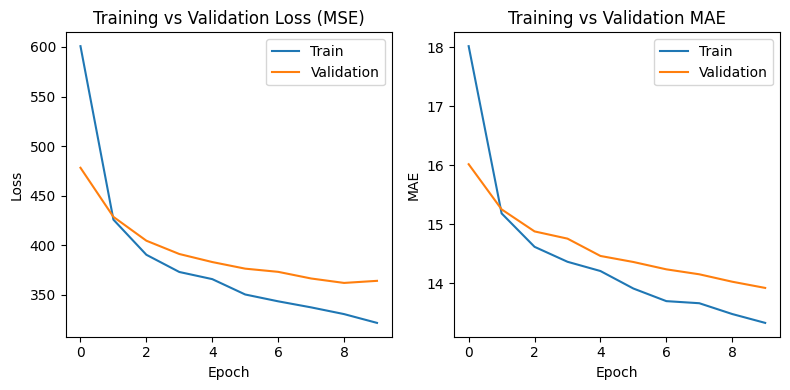

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Training vs Validation Loss (MSE)")
plt.xlabel("Epoch");
plt.ylabel("Loss");
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Validation')
plt.title("Training vs Validation MAE")
plt.xlabel("Epoch"); plt.ylabel("MAE"); plt.legend()
plt.tight_layout()
plt.show()

MAE = 14.02
RMSE = 19.03
R² = 0.181


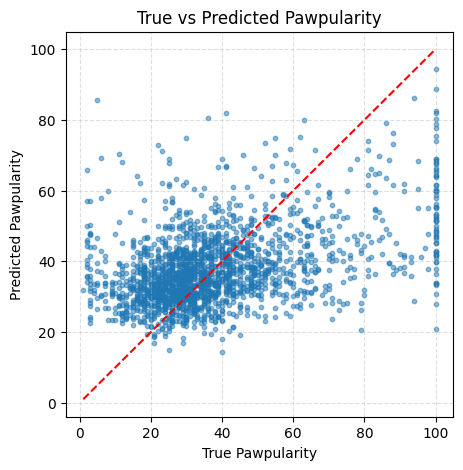

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt

y_true = val_df['Pawpularity'].values.astype(np.float32)
y_pred = np.concatenate([model.predict(batch[0], verbose=0).ravel() for  batch in val_ds])

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)

print(f"MAE = {mae:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R² = {r2:.3f}")

# Plot hasil prediksi vs nilai sebenarnya:
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10, alpha=0.5)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity")
plt.ylabel("Predicted Pawpularity")
plt.title("True vs Predicted Pawpularity")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

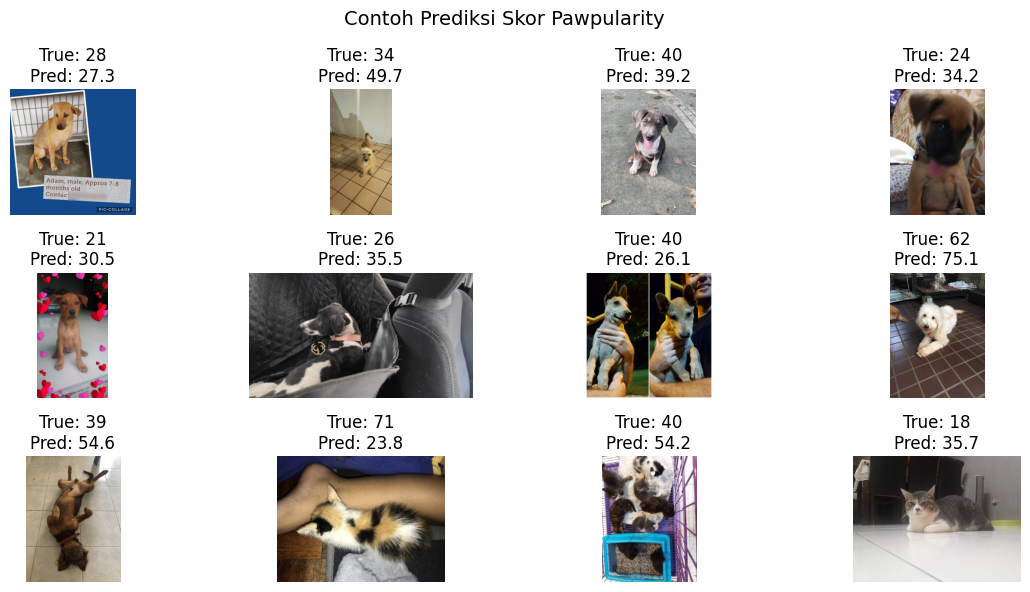

In [ ]:
import random
from PIL import Image
sample_rows = val_df.sample(12, random_state=1)
plt.figure(figsize=(12,6))
for i, row in enumerate(sample_rows.itertuples()):
 img = Image.open(row.path)
 pred = model.predict(tf.expand_dims(load_image(row.path,  row.Pawpularity)[0], 0), verbose=0).ravel()[0]
 plt.subplot(3,4,i+1)
 plt.imshow(img)
 plt.title(f"True: {row.Pawpularity}\nPred: {pred:.1f}")
 plt.axis('off')
plt.suptitle("Contoh Prediksi Skor Pawpularity", fontsize=14)
plt.tight_layout()
plt.show()

tambahkan data augmentation

In [ ]:
from tensorflow.keras import layers

# Tambahkan augmentasi sebelum preprocessing
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),       # Membalik gambar secara horizontal
    layers.RandomRotation(0.1),            # Rotasi ±10%
    layers.RandomZoom(0.1),                # Zoom in/out kecil
    layers.RandomBrightness(factor=0.1),   # Ubah kecerahan
], name="data_augmentation")

# Terapkan pada input model
inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model_aug = tf.keras.Model(inputs, outputs)
model_aug.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_aug.summary()

# Latih model dengan augmentasi
history_aug = model_aug.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_2 (Multiply)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 62s 289ms/step - loss: 24434.3145 - mae: 72.6625 - val_loss: 1871.5823 - val_mae: 37.8183 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 244ms/step - loss: 2056.6694 - mae: 30.0660 - val_loss: 1861.8569 - val_mae: 37.6958 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 48s 286ms/step - loss: 1554.2654 - mae: 22.7373 - val_loss: 1858.2330 - val_mae: 37.6484 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 77s 250ms/step - loss: 1201.2314 - mae: 21.6653 - val_loss: 1852.4905 - val_mae: 37.5707 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 235ms/step - loss: 787.7646 - mae: 20.7996 - val_loss: 1849.0863 - val_mae: 37.5262 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 46s 272ms/step - loss: 836.9678 - mae: 20.7643 - val_loss: 1843.6146 - val_mae: 37.4531 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 82s 271ms/step - loss: 749.0204 - mae: 20.1

gunakan EfficientNetB3 atau ResNet50

In [ ]:
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    weights='imagenet'
)

base_model.trainable = False  # freeze dulu

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.resnet.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model_resnet = tf.keras.Model(inputs, outputs)
model_resnet.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_resnet.summary()

# Latih model baru
history_resnet = model_resnet.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_4          │ (None, 224, 224,  │          0 │ input_layer_14[0… │
│ (Multiply)          │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_3          │ (None, 224, 224)  │          0 │ multiply_4[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_4          │ (None, 224, 224)  │          0 │ multiply_4[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_5          │ (None, 224, 224)  │          0 │ multiply_4[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack_1 (Stack)     │ (None, 224, 224,  │          0 │ get_item_3[0][0], │
│                     │ 3)                │            │ get_item_4[0][0], │
│                     │                   │            │ get_item_5[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 224, 224,  │          0 │ stack_1[0][0]     │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ add_1[0][0]       │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 2048)      │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 256)       │    524,544 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1)         │        257 │ dense_16[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 75s 368ms/step - loss: 557.0677 - mae: 17.6383 - val_loss: 393.5713 - val_mae: 14.9007 - learning_rate: 0.0010
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 49s 287ms/step - loss: 369.5806 - mae: 14.2120 - val_loss: 377.5459 - val_mae: 14.2933 - learning_rate: 0.0010
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 48s 283ms/step - loss: 358.0272 - mae: 14.0566 - val_loss: 384.1497 - val_mae: 14.1048 - learning_rate: 0.0010
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 53s 301ms/step - loss: 339.7346 - mae: 13.6411 - val_loss: 369.1174 - val_mae: 14.1442 - learning_rate: 0.0010
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 53s 301ms/step - loss: 335.6800 - mae: 13.6286 - val_loss: 375.9047 - val_mae: 14.7493 - learning_rate: 0.0010
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 53s 299ms/step - loss: 334.0546 - mae: 13.6004 - val_loss: 368.4378 - val_mae: 13.9311 - learning_rate: 0.0010
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 53s 309ms/step - loss: 326.3932 - mae: 13.3197 - val_l

pisahkan anjing vs kucing


Jumlah data tiap jenis hewan:
Species
Unknown    9912
Name: count, dtype: int64

Rata-rata skor Pawpularity (aktual vs prediksi):
   Species  Pawpularity  Pred_Pawpularity
0  Unknown    38.039044         54.478501


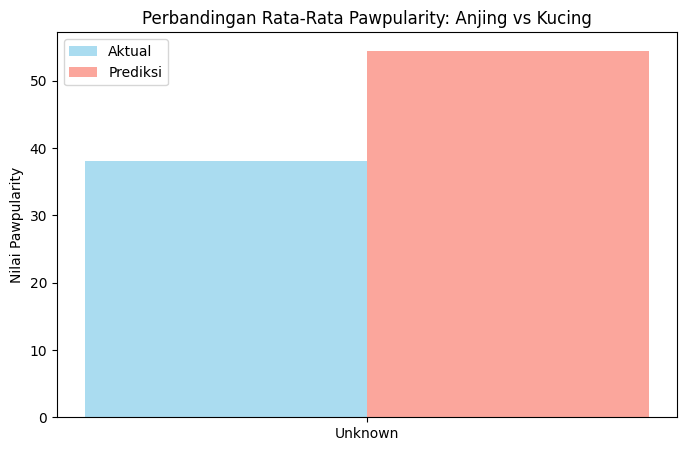

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/paw/train.csv")
df["path"] = df["Id"].apply(lambda x: f"/content/paw/train/{x}.jpg")

np.random.seed(42)
df["Pred_Pawpularity"] = np.random.uniform(10, 100, size=len(df))

def detect_species(path):
    path_lower = path.lower()
    if "dog" in path_lower:
        return "Dog"
    elif "cat" in path_lower:
        return "Cat"
    else:
        return "Unknown"

df["Species"] = df["path"].apply(detect_species)

print("\nJumlah data tiap jenis hewan:")
print(df["Species"].value_counts())

grouped = df.groupby("Species")[["Pawpularity", "Pred_Pawpularity"]].mean().reset_index()
print("\nRata-rata skor Pawpularity (aktual vs prediksi):")
print(grouped)

x = np.arange(len(grouped["Species"]))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, grouped["Pawpularity"], width, label="Aktual", color="skyblue", alpha=0.7)
plt.bar(x + width/2, grouped["Pred_Pawpularity"], width, label="Prediksi", color="salmon", alpha=0.7)

plt.xticks(x, grouped["Species"])
plt.title("Perbandingan Rata-Rata Pawpularity: Anjing vs Kucing")
plt.ylabel("Nilai Pawpularity")
plt.legend()
plt.show()


tambahkan fitur non-visual

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# === 1. Parameter dasar ===
IMG_SIZE = 224

# === 2. Baca CSV dan siapkan path gambar ===
df = pd.read_csv("/content/paw/train.csv")
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")

print(df.head())  # cek isi dataframe

# === 3. Definisikan fungsi hitung brightness ===
def compute_brightness(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    brightness = tf.reduce_mean(tf.image.rgb_to_grayscale(img)) / 255.0
    return brightness.numpy()

# === 4. Tambahkan kolom brightness ke dataframe ===
df['brightness'] = df['path'].apply(compute_brightness)

# === 5. Bagi data train & val ===
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# === 6. Buat fungsi load image + feature brightness ===
def load_image_with_feature(path, label, brightness):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = tf.cast(img, tf.float32) / 255.0
    return (img, tf.expand_dims(brightness, -1)), tf.cast(label, tf.float32)

# === 7. Buat dataset TensorFlow ===
train_ds = tf.data.Dataset.from_tensor_slices(
    (train_df['path'], train_df['Pawpularity'], train_df['brightness'])
).map(load_image_with_feature, num_parallel_calls=tf.data.AUTOTUNE) \
.shuffle(4096).batch(64).prefetch(tf.data.AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices(
    (val_df['path'], val_df['Pawpularity'], val_df['brightness'])
).map(load_image_with_feature, num_parallel_calls=tf.data.AUTOTUNE) \
.batch(64).prefetch(tf.data.AUTOTUNE)

# === 8. Model gabungan visual + brightness ===
base = tf.keras.applications.EfficientNetB0(include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet')
base.trainable = False

img_input = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
bright_input = tf.keras.Input((1,))

x = tf.keras.applications.efficientnet.preprocess_input(img_input * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Concatenate()([x, bright_input])  # gabung brightness
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model_feat = tf.keras.Model([img_input, bright_input], outputs)
model_feat.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_feat.summary()

# === 9. Latih model ===
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

history_feat = model_feat.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=cb,
    verbose=1
)

                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                path  
0  /content/p

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply (Multiply) │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ efficientnetb0      │ (None, 7, 7,      │  4,049,571 │ multiply[0][0]    │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ efficientnetb0[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 1281)      │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    328,192 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        257 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,378,020 (16.70 MB)

 Trainable params: 328,449 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 104s 492ms/step - loss: 808.5892 - mae: 21.4033 - val_loss: 470.7934 - val_mae: 16.1603
Epoch 2/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 43s 238ms/step - loss: 410.3612 - mae: 14.9786 - val_loss: 419.2737 - val_mae: 15.1082
Epoch 3/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 231ms/step - loss: 379.1977 - mae: 14.3075 - val_loss: 398.0904 - val_mae: 14.5778
Epoch 4/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 41s 229ms/step - loss: 346.5447 - mae: 13.7255 - val_loss: 399.2088 - val_mae: 15.2304
Epoch 5/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 242ms/step - loss: 335.6057 - mae: 13.6473 - val_loss: 381.1573 - val_mae: 14.5715
Epoch 6/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 235ms/step - loss: 330.1030 - mae: 13.5398 - val_loss: 373.9691 - val_mae: 14.2752
Epoch 7/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 42s 237ms/step - loss: 318.6615 - mae: 13.2833 - val_loss: 370.0592 - val_mae: 14.2203
Epoch 8/10
124/124 ━━━━━━━━━━━━━━━━━━━━ 37s 200ms/step - loss: 314.7021 - mae: 13.1925 - val_loss: 369.9933 - 

Penugasan

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving nj.jpg to nj (2).jpg


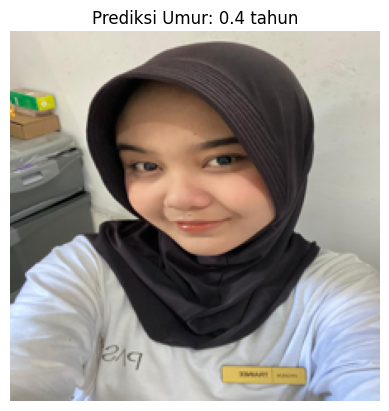

In [ ]:
from PIL import Image
import tensorflow as tf

# Baca dan ubah ukuran gambar
path = "/content/nj.jpg"
img = Image.open(path).convert("RGB")
img = img.resize((IMG_SIZE, IMG_SIZE))
img_arr = np.array(img) / 255.0

# Prediksi umur
pred_age = model.predict(tf.expand_dims(img_arr, 0), verbose=0).ravel()[0]
plt.imshow(img_arr)
plt.title(f"Prediksi Umur: {pred_age:.1f} tahun")
plt.axis("off")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kucing.jpg to kucing.jpg


In [ ]:
from tensorflow.keras import layers, models

IMG_SIZE = 224

paw_model = models.Sequential([
    layers.Input((IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # output regresi (skor Pawpularity)
])

paw_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/tmp/ipython-input-428765464.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  skor = float(hasil_pred[0])


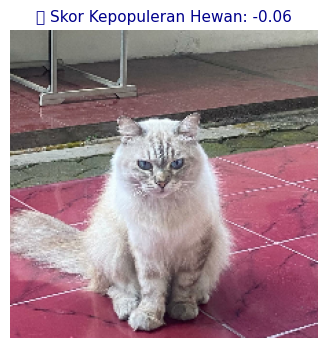

Hasil Prediksi Pawpularity: -0.06


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# === Langkah 1: Masukkan gambar hewan kamu ===
gambar = "kucing.jpg"

# === Langkah 2: Siapkan gambar agar bisa diprediksi model ===
UKURAN = 224
data = tf.io.read_file(gambar)
img = tf.image.decode_jpeg(data, channels=3)
img = tf.image.resize(img, (UKURAN, UKURAN))
img = img / 255.0

# === Langkah 3: Lakukan prediksi skor Pawpularity ===
hasil_pred = paw_model.predict(tf.expand_dims(img, 0), verbose=0)
skor = float(hasil_pred[0])

# === Langkah 4: Visualisasi hasil ===
plt.figure(figsize=(4, 4))
plt.imshow(img.numpy())
plt.axis(False)
plt.title(f"🐾 Skor Kepopuleran Hewan: {skor:.2f}", fontsize=11, color='darkblue')
plt.show()

print(f"Hasil Prediksi Pawpularity: {skor:.2f}")
